# NEPAL GIS EDA Assignments

#installing all the required libraries

In [ ]:
pip install -r "requirements.txt"

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.mask import mask
import fiona

In [5]:
# Path of the shape file
path = "data/Shape_Data/local_unit.shp"
# Loading the shape file
gdf = gpd.read_file(path)
gdf

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."
...,...,...,...,...,...,...
772,4,NAWALPARASI_E,Chitawan National Park,National Park,Gandaki,"POLYGON ((84.32537 27.68957, 84.32562 27.6894,..."
773,5,RUKUM_E,Bhume,Gaunpalika,5,"POLYGON ((82.65382 28.65759, 82.65428 28.65724..."
774,5,RUKUM_E,Putha Uttarganga,Gaunpalika,5,"POLYGON ((82.76718 28.80407, 82.76748 28.80383..."
775,5,RUKUM_E,Sisne,Gaunpalika,5,"POLYGON ((82.67327 28.85214, 82.67373 28.85205..."


In [6]:
# Checking the basic informations
print("Head:: \n" , gdf.head())
print("\nCRS:: \n" , gdf.crs)
print("\nGeometry:: \n", gdf.geometry)

Head:: 
    STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  

CRS:: 
 GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]

Geometry:: 
 0 

# Pre Data Processing

In [7]:
# Checking the quality of data
print(gdf.isnull().sum()) # Counting the missing values in each columns

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64


In [8]:
print(gdf.describe())  # Numeric columns summary

       STATE_CODE
count  777.000000
mean     3.651223
std      2.000799
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      7.000000


In [9]:
print(gdf["STATE_CODE"].value_counts().sort_index())

STATE_CODE
1    139
2    140
3    124
4     89
5    113
6     79
7     93
Name: count, dtype: int64


# Visualization

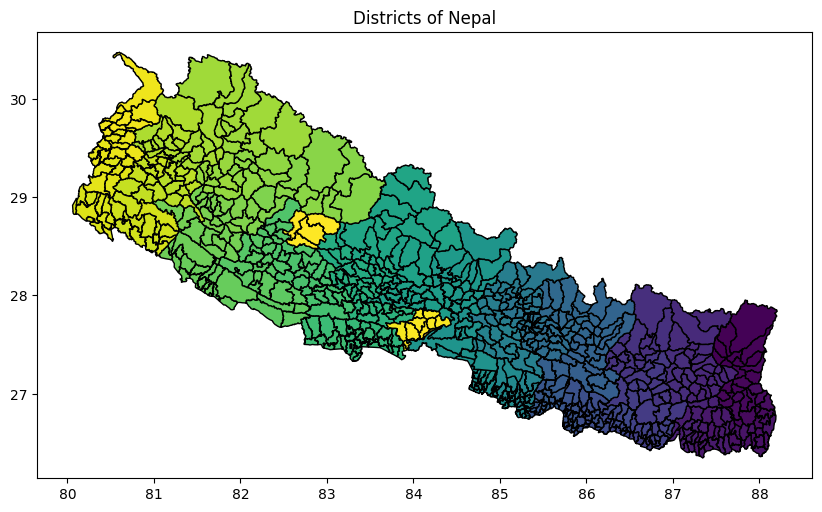

In [10]:
# plotting the GIS data of Nepal
gdf.plot(figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Districts of Nepal")
plt.show()

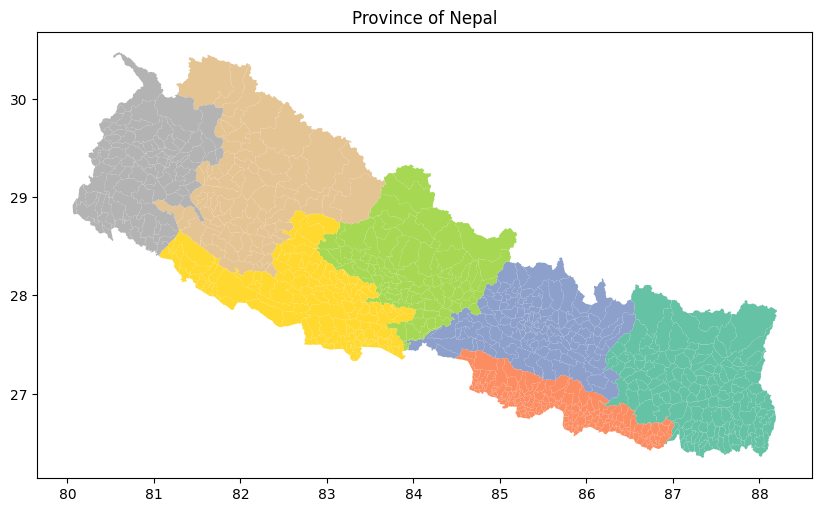

In [11]:
# Plot by State Code
gdf.plot(column="STATE_CODE", cmap="Set2", legend=False, figsize=(10, 6))
plt.title("Province of Nepal")
plt.show()

# Loading a raster file

In [12]:
# loading raster file
raster_precipitation_path_2020 = "data/nepal_climate_data/nepal_precipitation_2020.tif"
raster_precipitation_path_2050 = "data/nepal_climate_data/nepal_precipitation_2050.tif"
raster_temperature_path_2020 = "data/nepal_climate_data/nepal_temperature_2020.tif"
raster_temperature_path_2050 = "data/nepal_climate_data/nepal_temperature_2050.tif"


In [13]:
# Function to load raster image
def read_raster(path):
	with rasterio.open(path) as src:
		raster_src = src.read(1)
		profile = src.profile

	return raster_src, profile

In [14]:
temp_2020, temp_profile_2020 = read_raster(raster_temperature_path_2020)
temp_2050, temp_profile_2050 = read_raster(raster_temperature_path_2050)
precip_2020, precip_profile_2020 = read_raster(raster_precipitation_path_2020)
precip_2050, precip_profile_2050 = read_raster(raster_precipitation_path_2050)

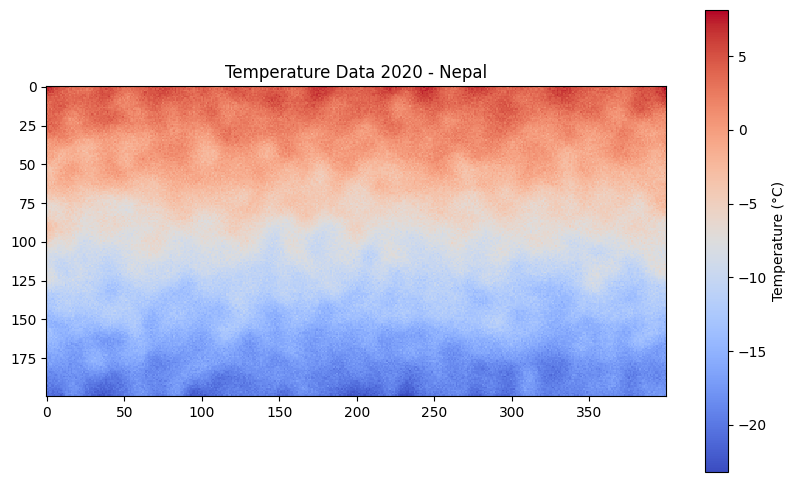

In [15]:
# Basic Visualization of Nepal temperature for 2020

plt.figure(figsize=(10, 6))
plt.imshow(temp_2020, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Temperature (°C)")
plt.title("Temperature Data 2020 - Nepal")
plt.show()


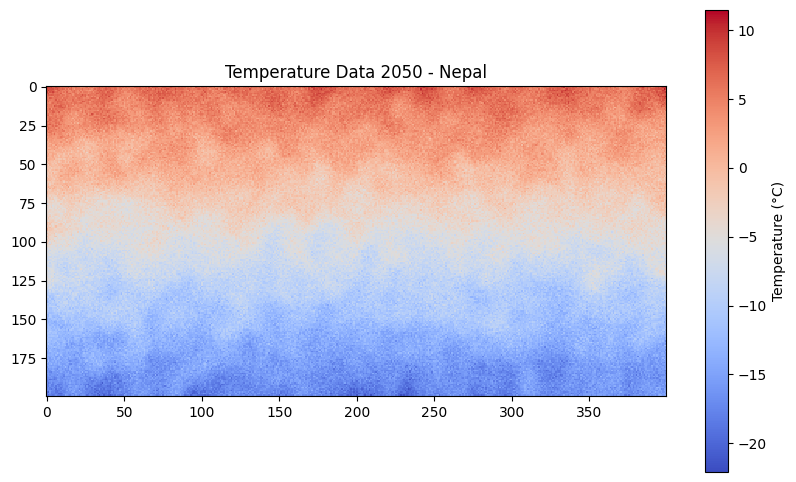

In [16]:
# Basic Visualization of Nepal temperature for 2050

plt.figure(figsize=(10, 6))
plt.imshow(temp_2050, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Temperature (°C)")
plt.title("Temperature Data 2050 - Nepal")
plt.show()


In [17]:
# Extract the first band# Mask raster with the vector file (Nepal boundaries)
def mask_raster(raster_path, vector_path):
    with fiona.open(vector_path, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]  # Read vector geometry

    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, shapes, crop=True)  # Mask raster
        out_image = out_image[0]  # Extract the first band

    return out_image

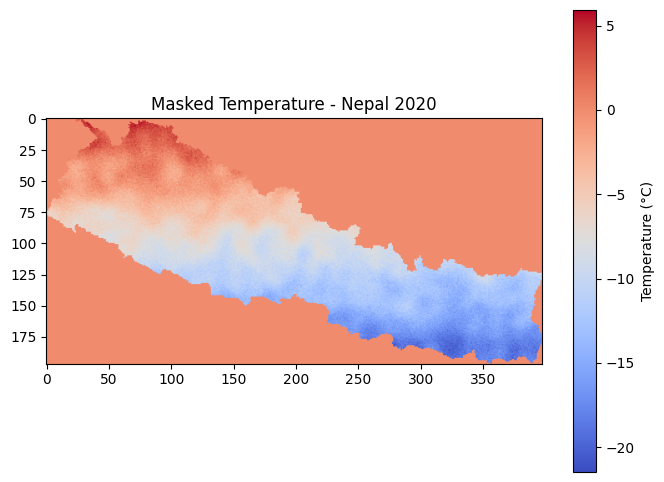

In [18]:
# Apply masking Temperature 2020
mask_temp_2020 = mask_raster(raster_temperature_path_2020, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_temp_2020, cmap="coolwarm")
plt.title("Masked Temperature - Nepal 2020")
plt.colorbar(label="Temperature (°C)")
plt.show()

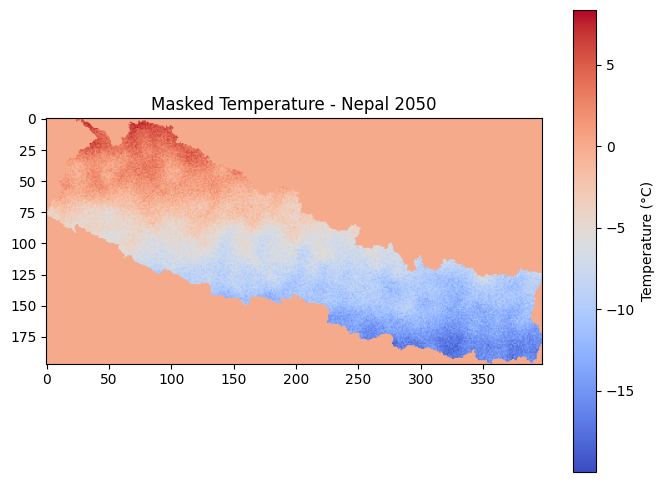

In [19]:
# Apply masking 2050 Temperature
mask_temp_2050 = mask_raster(raster_temperature_path_2050, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_temp_2050, cmap="coolwarm")
plt.title("Masked Temperature - Nepal 2050")
plt.colorbar(label="Temperature (°C)")
plt.show()

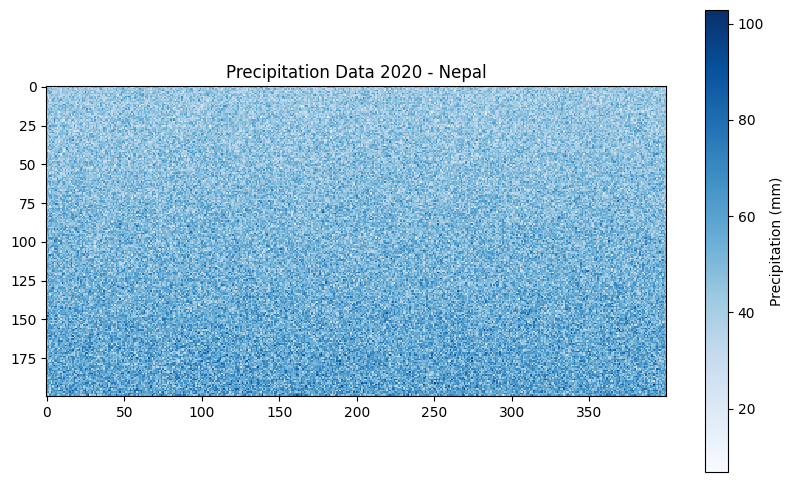

In [20]:
# Basic Visualization of Nepal Precipitation for 2020

plt.figure(figsize=(10, 6))
plt.imshow(precip_2020, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Precipitation (mm)")
plt.title("Precipitation Data 2020 - Nepal")
plt.show()


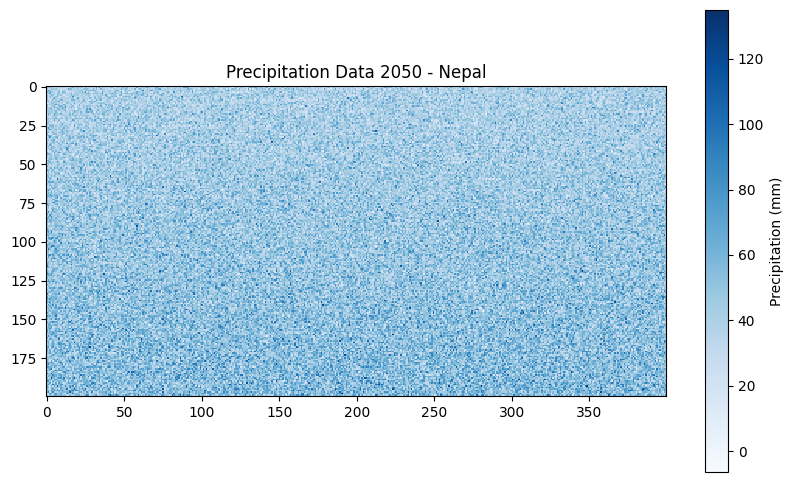

In [21]:
# Basic Visualization of Nepal Precipitation for 2020

plt.figure(figsize=(10, 6))
plt.imshow(precip_2050, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Precipitation (mm)")
plt.title("Precipitation Data 2050 - Nepal")
plt.show()

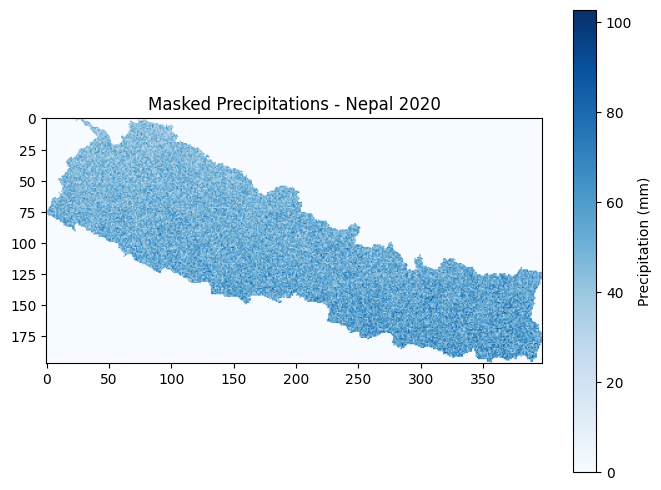

In [22]:
# Apply masking 2020 Precipitaiton
mask_precip_2020 = mask_raster(raster_precipitation_path_2020, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_precip_2020, cmap="Blues")
plt.title("Masked Precipitations - Nepal 2020")
plt.colorbar(label="Precipitation (mm)")
plt.show()

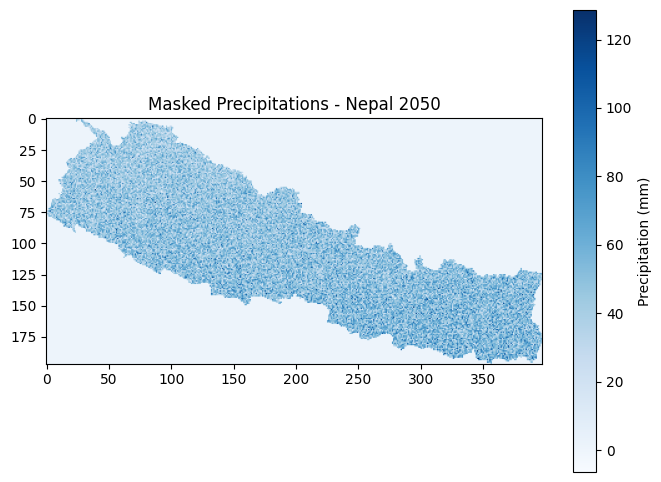

In [23]:
# Apply masking 2050 Precipitaiton
mask_precip_2050 = mask_raster(raster_precipitation_path_2050, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_precip_2050, cmap="Blues")
plt.title("Masked Precipitations - Nepal 2050")
plt.colorbar(label="Precipitation (mm)")
plt.show()

In [24]:
# Extract statistics of raster data
def raster_stats(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read first band
        stats = {
            "Min": np.min(data),
            "Max": np.max(data),
            "Mean": np.mean(data),
            "Std Dev": np.std(data)
        }
    return stats

# Compare precipitation in 2020 and 2050
precip_2020_stats = raster_stats(raster_precipitation_path_2020)
precip_2050_stats = raster_stats(raster_precipitation_path_2050)

print("Precipitation Stats (2020):", precip_2020_stats)
print("Precipitation Stats (2050):", precip_2050_stats)

Precipitation Stats (2020): {'Min': np.float64(6.8563433623171495), 'Max': np.float64(102.83267376645965), 'Mean': np.float64(50.83796524449648), 'Std Dev': np.float64(11.392472418361306)}
Precipitation Stats (2050): {'Min': np.float64(-6.410086048906941), 'Max': np.float64(134.9692970311526), 'Mean': np.float64(48.285593218473295), 'Std Dev': np.float64(16.390304034131695)}


In [26]:
# Function to return monthly values of raster files (band values)
def monthly_values(path):
	with rasterio.open(path) as src:
		monthly_values = [src.read(i) for i in range(1, 13)]  # Load all 12 bands

	return monthly_values

# function to calculate the monthly mean values
def monthly_mean(monthly_values):
	monthly_means = [np.mean(month) for month in monthly_values]
	return monthly_means


def plot_montly_trend(monthly_means, label, units, year):
	# Plot temporal trend
	plt.figure(figsize=(10, 5))
	plt.plot(range(1, 13), monthly_means, marker="o", linestyle="-", color="b")
	plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
	plt.xlabel("Month")
	plt.ylabel(f"Mean {label} ({units})")
	plt.title(f"Monthly {label} Trend ({year})")
	plt.grid()
	plt.show()

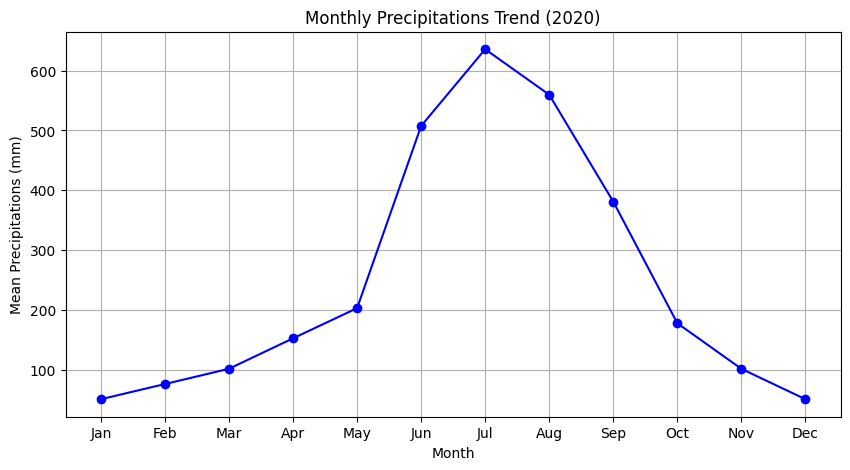

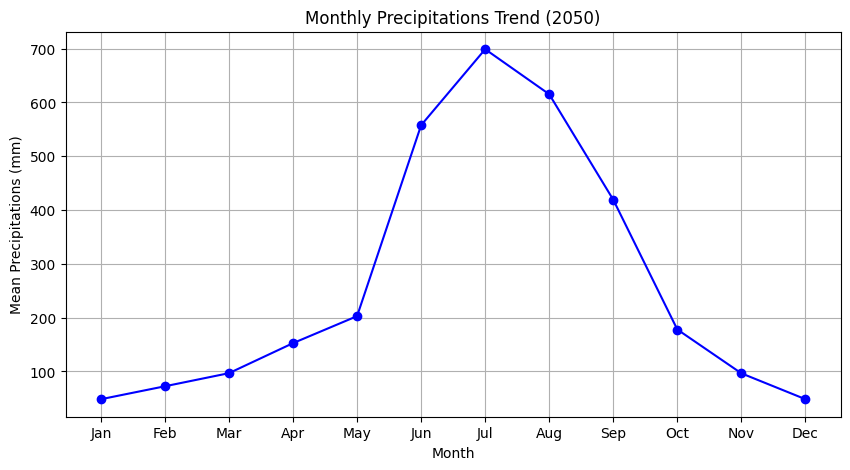

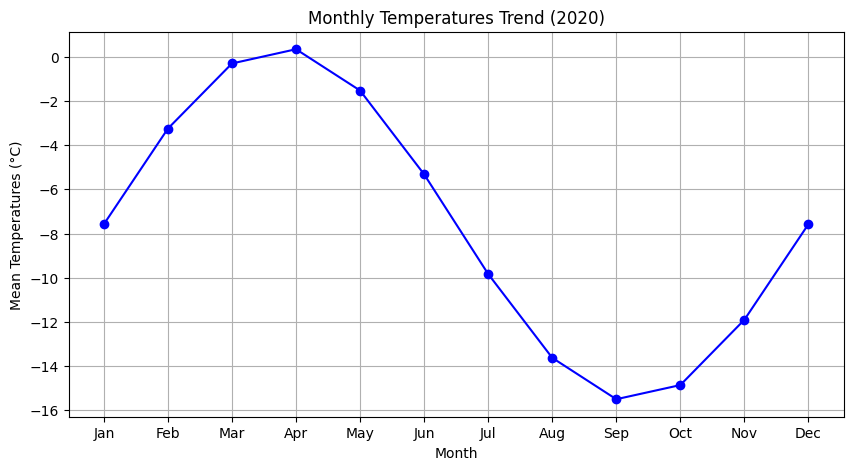

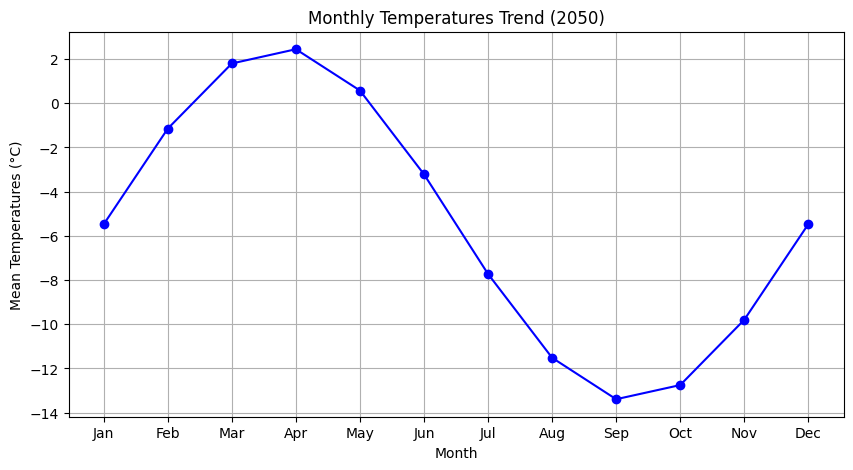

In [27]:
monthly_temp_2020 = monthly_values(raster_temperature_path_2020)
monthly_temp_2050 = monthly_values(raster_temperature_path_2050)
monthly_precip_2020 = monthly_values(raster_precipitation_path_2020)
monthly_precip_2050 = monthly_values(raster_precipitation_path_2050)

# Computing the montlhy mean temp and precipitation for 2020 / 50
monthly_mean_temp_2020 = monthly_mean(monthly_temp_2020)
monthly_mean_temp_2050 = monthly_mean(monthly_temp_2050)
monthly_mean_precip_2020 = monthly_mean(monthly_precip_2020)
monthly_mean_precip_2050 = monthly_mean(monthly_precip_2050)

#plotting the montly trend of precipation and temperatures
plot_montly_trend(monthly_mean_precip_2020, "Precipitations", "mm", 2020)
plot_montly_trend(monthly_mean_precip_2050, "Precipitations", "mm", 2050)
plot_montly_trend(monthly_mean_temp_2020, "Temperatures", "°C", 2020)
plot_montly_trend(monthly_mean_temp_2050, "Temperatures", "°C", 2050)

Exploratory Data Analysis (EDA) Insights

Temperature Findings:
Average Temperature Changes:

The average temperature in 2050 is warmer than in 2020 (-5.47°C vs -7.58°C), showing a warming trend over 30 years.

The middle value (median) of temperatures also increases from -7.69°C to -5.58°C, meaning temperatures are generally getting warmer.

Extreme Temperatures:

The coldest temperature in 2050 (-22.09°C) is slightly warmer than in 2020 (-23.20°C).

The hottest temperature shows a bigger increase, from 8.14°C in 2020 to 11.47°C in 2050.

What This Means: Both average and extreme temperatures are getting warmer from 2020 to 2050, which likely shows the effects of climate change.

Rainfall Findings:
Average Rainfall Changes:

The average rainfall decreases slightly from 50.84 mm in 2020 to 48.29 mm in 2050.

The middle value (median) of rainfall also drops from 50.37 mm to 46.74 mm, confirming that overall rainfall is decreasing.

Extreme Rainfall:

The minimum rainfall drops from 6.86 mm in 2020 to -6.41 mm in 2050. The negative number might mean more periods with no rain or drought.

The maximum rainfall increases from 102.83 mm to 134.97 mm, suggesting heavier rainstorms in the future.

What This Means: While average rainfall is decreasing, the heaviest rainfalls are getting more intense. This suggests more extreme weather patterns.

Key Takeaways:
Temperature and Rainfall Patterns:

Temperatures are generally getting warmer.

Rainfall is becoming more extreme - longer dry periods but also heavier downpours.

Possible Effects:

Temperature: More heatwaves could affect health, agriculture, and the environment.

Rainfall: Areas might be drier overall, but face more flooding when it does rain.

Drought and Flood Risks:

More chances of drought due to lower minimum rainfall.

Higher flood risk due to heavier maximum rainfall.

Summary:
This analysis shows that while average temperatures and rainfall are changing somewhat, the biggest changes are in the extreme values. The warming trend and more extreme rainfall patterns suggest we'll see more unpredictable and severe weather in the future, which could seriously affect ecosystems, buildings, and people's lives.